# Running Single image Inference on Unet

## Necessary Imports

In [10]:
import os
import cv2
from unet.UNet import UNet
from unet.utils import viz_utils
from unet.utils import pipeline

## Creating Model

In [2]:
params = {
    'loss': 'sparse_categorical_crossentropy',
    'batch_size': 16,
    'optimizer': 'sgd',
    'epochs': 2,
    'image_shape': (224, 224),
    'seed': 47,
    'apply_augmentation': True,
    'augmentation_threshold': 0.4,
    'checkpoint_path': '.'
}

In [3]:
unet = UNet(params)

[INFO]: Parameters loaded


In [4]:
unet.restore_weights()

[INFO]: model generated successfully
[INFO]: Done restoring weights


## Getting Test Images

In [5]:
test_img_path = r'data/test_images'
test_mask_path = r'data/test_pixel_masks'
image_names = os.listdir(test_img_path)

In [6]:
selection = 20
image_file = [name for name in image_names if str(selection) in name][0]
image_file = os.path.join(test_img_path, image_file)
image_file

'data/test_images/20.jpeg'

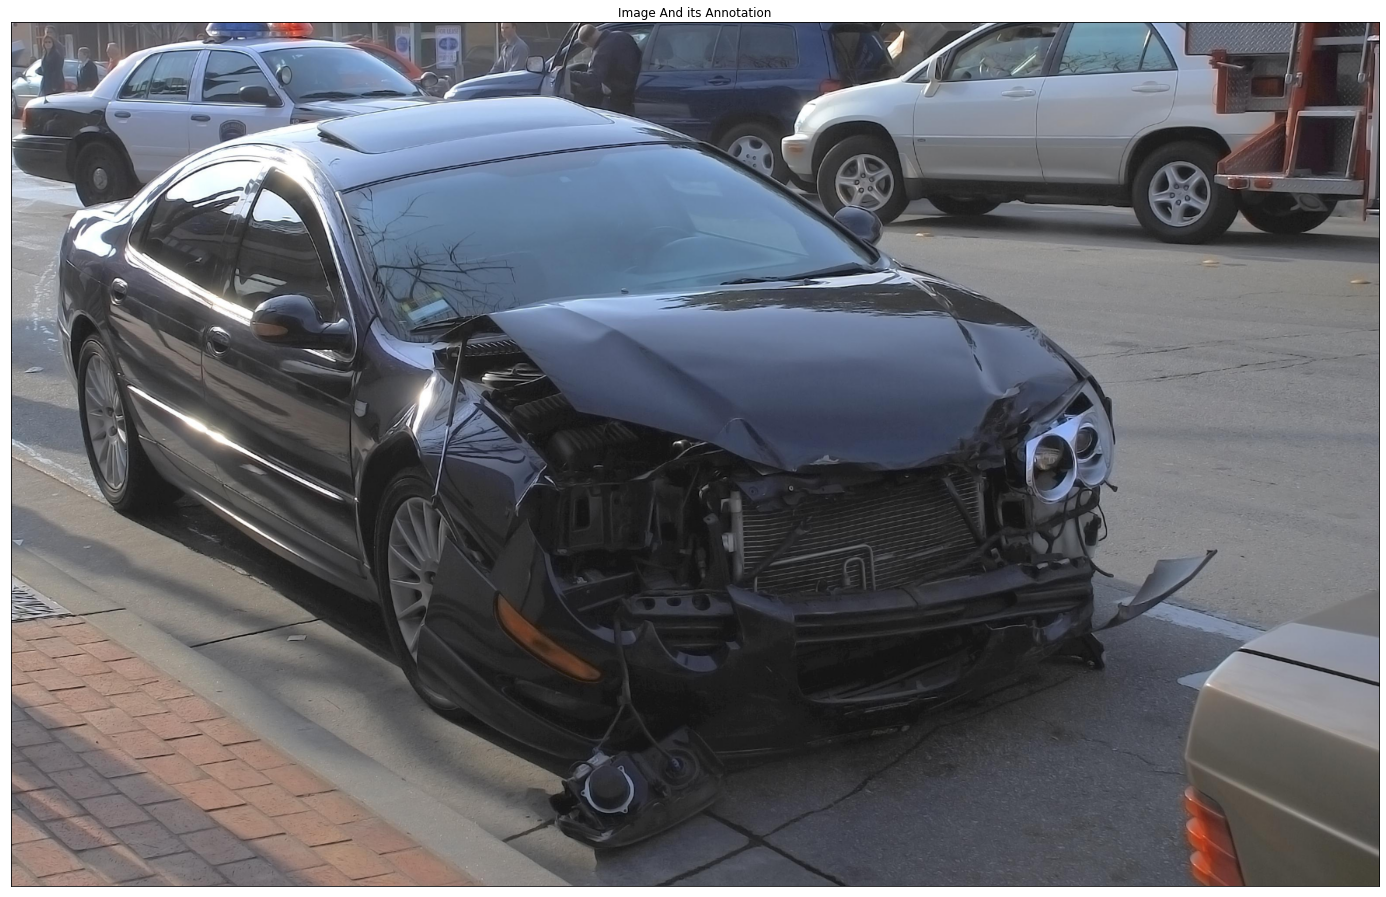

In [11]:
image = cv2.imread(image_file)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
viz_utils.visualize_single_data(image)

## Inference

In [7]:
prediction = unet.predict(image_file)

In [8]:
prediction.shape

(1, 224, 224, 4)

In [12]:
masked_image = pipeline.get_masked_image(image, prediction)

In [16]:
masked_image.shape

(1983, 3141, 3)

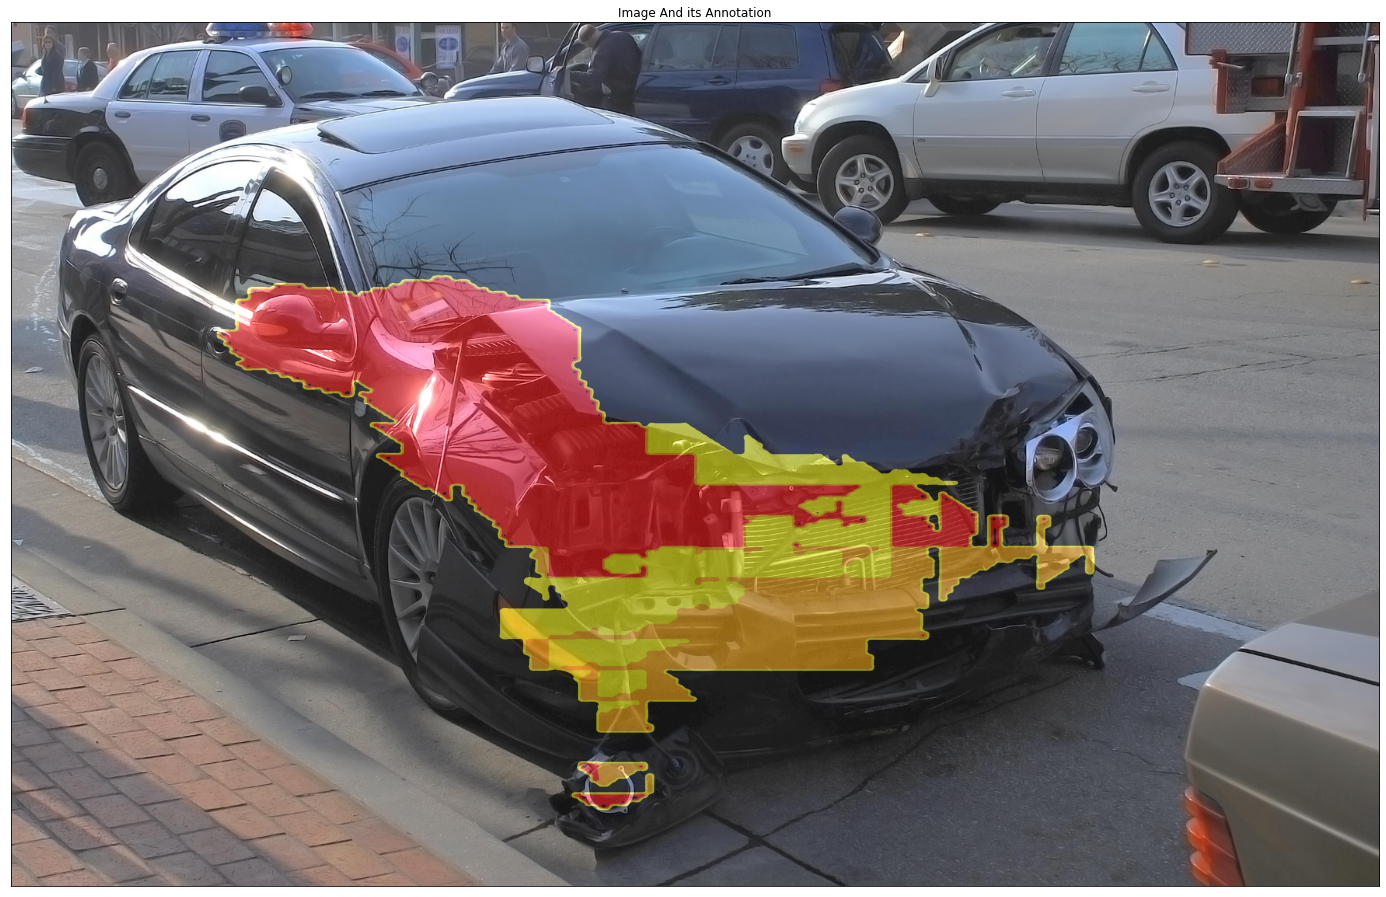

In [15]:
viz_utils.visualize_single_data(masked_image)

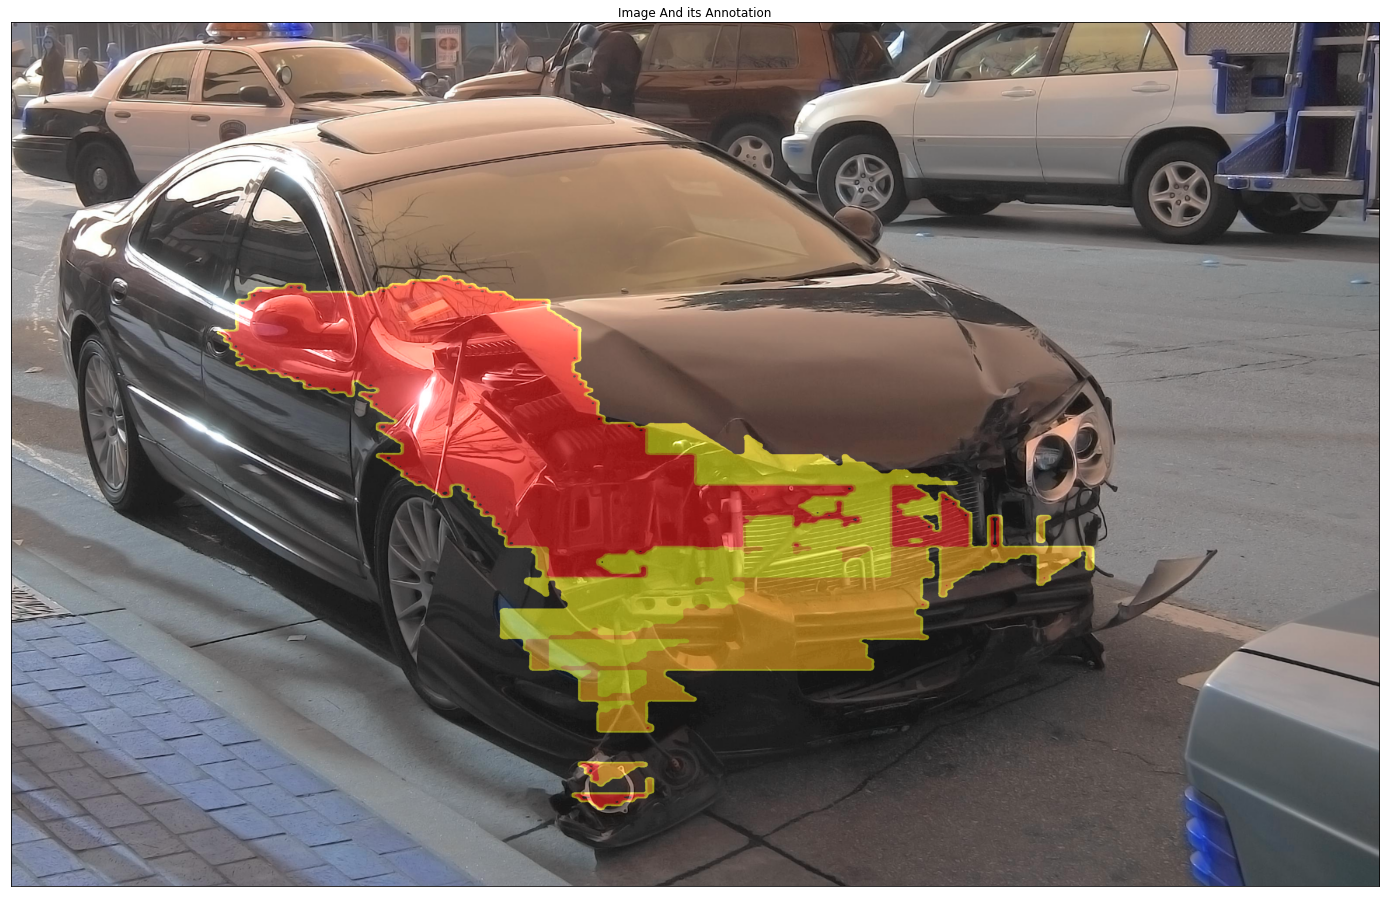

In [11]:
unet.show_prediction_result(image_file)